# Statistical Learning

$\newcommand{\Nor}[2]{\mathcal{N}(#1,#2)}$

$\newcommand{\Xvec}[1]{(X_1,\dots,X_{#1})}$

$\newcommand{\E}[1]{\mathrm{E}\left[ #1 \right]}$

$\newcommand{\Var}[1]{\mathrm{Var}\left( #1 \right)}$
$\newcommand{\Cov}[2]{\mathrm{Cov}\left( #1, #2 \right)}$


Test of macros


$\Nor{0}{1}$

$\Xvec{n}$

$\E{X}$

$\Var{X}$

$\Cov{X}{Y}$

In [1]:
library(ggplot2)
library(GGally)
library(carData)

library(ISLR2)
library(tree)




Registered S3 method overwritten by 'GGally':
  method from   
  +.gg   ggplot2



## Chapter 2



- Inputs are called *predictors* or *independent variables* 
- Outputs are called *responses* or *dependent variables*.
- *Quantitative* variables. Measurements close in value are close in nature. Typically represented numerically by codes. 
- *Qualitative* variables are also reffered to as *categorical* or *discrete* variables as well as *factors*. For example "failiure" and "success".
- *Ordered categorical* variable, such as small, medium and large. There is an ordering, but no metric notion is appropriate. 

The distinction in output type has lead to a naming convention for prediction tasks:
- *Regression* when we want to predict quantitative outputs.
- *Classification* when we want to predict qualitative outputs. 



#### Least squares (Regression)

Given inputs $X = (X_1,...,X_p)$ we predict the output $Y$ via the model
$$ \hat{Y} = \hat{\beta_0} + \sum\limits_{j=1}^p X_j\hat{\beta_j}. $$
The term $\hat{\beta_0}$ is the intercept, also known as the *bias* in ML.
If we include the constant variable $1$ in $X$ we can write the linear model compactly as
$$ \hat{Y} = X^\top\hat{\beta}$$
We assume that the intercept is allways included that $\hat{\beta}$, such that $(X,\hat{Y})$ is a subspace.

The method of least squares 
$$ RSS(\beta) = \sum\limits_{i=1}^N(y_i-x_i^\top\beta)^2$$
In matrix form we have
$$ (y-X\beta)^\top (y-X\beta)$$
where $X$ is an $N\times p$ matrix with each row an input vector, and $y$ an $N$-vactor of outputs in the treining set.
By differentiating wrt $\beta$ we get the *normal equations*
$$ X^\top(y-X\beta) = 0 $$
If $X^\top X$ is nonsingular the solution is unique.

The decition boundary from least squares is smooth. Relies heavily on the assumption that the decition boundary is linear. High variance and low bias.


#### Nearest Neighbour (Classification)

NN methods use those observations in the training set $\mathcal{T}$ closest in input space to $x$ to form $\hat{Y}$. The $k$-nearest neighbor fit for $\hat{Y}$ is 
$$ \hat{Y}(x) = \frac1k \sum\limits_{x_i\in N_k(x)} y_i $$ 
where $N_k(x)$ is the neighborhood of $x$ defined by the $k$ nearest points $x_i$ in the training sample. Normally use euclidean metric.

The test of the model on a independent test set gives a way of choosing more suitable values for $k$.

Does not rely on stringent assumptions about the underlying data. Any particular region of the decition boundary depends on a handfull of input points and their particular positions. High variance and low bias.


## Module 2: Statistical Learning



#### Prediction

In prediction we *can* treat the estimator $\hat{f}$ as a back box. 
The accuracy of a prediction depends on two quantities, the *reducible* and the *irreducible* error. 

A given estimate $\hat{f}$ for a set of predictors $X$ which yields the prediction $\hat{Y} = \hat{f}(X)$. Assume $\hat{f}$ and $X$ are fixed.

$$ \mathrm{E}(Y-\hat{Y})^2 = \mathrm{E}(f(X)+\epsilon-\hat{f}(X))^2  $$
$$ = \underbrace{(f(X)-\hat{f}(X))^2}_{\text{Reduceible}}  + \underbrace{Var(\epsilon)}_{\text{Irreduceible}}$$



#### Inference

Interested in understanding the association bwteen $Y$ and $X_1,...,X_p$. In this situation we wish to estimate $f$, but not necessarily to make predictions for $Y$.
$\hat{f}$ cannot be treated as a black box, since we need to know its exact form.

Some questions in inference
- Which predictors are associated with the response? Identify the important predicors. 

- What is the relationship between response and each predictor? 

- Can the relationship between $Y$ and each predictor be adequately summarized using a linear equation, or is the relationship more compliated?

### How do we stimate $f$?

We have $n$ datapoints $(x_i,y_i)$ of inputs and outputs, the *training data*.

**Paramtric methods** involve a two-step model-based approach.
1. Make an assumption about the functional form or shape of $f$.
2. Use a procedure to *fit* or *train* the model using the training data. Least squares for linear models f.eks.

Too flexible/complex models can lead to *overfitting*, which means they follow the errors or noise in the data too closely. 

**Non-parametric methods** 

Do not make any expicit assumptions on the functional form of $f$. By avoiding the assumption of the form of $f$ they have the potential to accurately fit a wider range of possible shapes of $f$. Suffer from the need of a very large number of observations in order to obtain an accurate estimate for $f$. Far more than typically needed for marametric methods.
 

### The trade-off between prediction accuracy and model interpetability

### Supervised vs unsupervised learning

## Module 3: Linear Regression

### Linear Regression

- Very simple approach for supervised learning.

- Maybe too simple, but still very usefull.

Linear regression *model*

$$ Y = \beta_0 + \beta_1x+\epsilon, \quad  \epsilon \sim N(0,\sigma^2)$$

**Modeling assumptions**

For any pairs $(x_i,Y_i)$ the error $\epsilon_i \sim N(0,\sigma^2)$. Errors are independent of any other variable, also eachother. 

**Parameter estimation** (model fitting)

The task is to estimate the values $\beta_i$ and the residual variance $\sigma^2$ for a given set of data. There is in genereal no perfectly fitting line, but we want the "best". Minimize deviations between data points and the regession line.

**Least squares**

- The parameters of the linear regression, $a$ and $b$, are estimated such that the sum of *squared vertical distances* (residual sum of squares)
$$ RSS = \sum_{i=1}^n e_1^2, \quad \text{where  } e_i = y_i -(a+bx_i)$$
is being minimized. The best estimates are called $\hat{\beta}_0$ and $\hat{\beta}_1$.

- The $i$-th *residual* of the model is the difference between the $i$-th *observed* response value and the $i$-th *predicted* value, and is written as:
$$ e_i = Y_i - \hat{y}_i.$$
We may regard residuals as *predictions* of the error term $\epsilon_i$.

**Least squares estimators**

- Using $n$ independent data points, the LSE for simple linear regression are given as
$$ \hat{\beta}_0 = \bar{y} - \hat{\beta}_1 \bar{x}$$
and 
$$\hat{\beta}_1 = \frac{\Cov{x}{y}}{\Var{x}}$$

The coefficients $\hat{\beta}_0$ and $\hat{\beta}_1$ are random variables. 


**Testing the effect of a covariate**

- Specify the *null hypothesis*. Typically
$$ H_0: \quad \beta_0 = 0$$
i.e no relationship between $X$ and $Y$. 

- *Alternative hypothesis* (two sided)
$$ H_A: \quad \beta_1 \neq 0$$
i.e there is a relationship between $X$ and $Y$.

- To carry out a statistical test, we need a *test statistic*. Some type of summary statistic that follows a known distribution under $H_0$. For our purpose, we use the $T$-statistic.
$$ T = \frac{\hat{\beta}_1}{SE(\hat{\beta}_1)}$$


**Classical linear model**

$$ Y = X\beta + \epsilon$$
$Y$ vector of responses, $X$ design matrix (rows are observations), $\beta$ vector of regression parameters, $\epsilon$ vector of random errors.

The design matrix is assumed to have full rank.

When the error term is multivatiate normal, the response variable $Y$ is normal as well.

**Parameter estimation**

In MLR the parameter vector $\beta$ is estimated with *maximum likelihood* and *least squares*. For normal linear regression these methods give the same estimators.

- Minimize the $RSS = (Y-X\hat{\beta})^\top(Y-X\hat{\beta})$ by differentiating and setting equal to $0$. This results in 
$$ \hat{\beta} = (X^\top X)^{-1}X^\top Y$$




# Module 4: Classification

## Classifiers

### Logistic regression

Logistic regression models the *probability* that $Y$ belongs to a particular category. If $X$ is the covariates and $Y$ a binary response variable then logistic regression models the conditional probabilities $p(X) = P(Y= 1 | X)$.

To model $p$ we use the logistic function. Let $X^{\top}\beta = \beta_0 + \sum_{i=1}^n \beta_i X_i$, then 

$$ p(X) = \frac{e^{X^{\top}\beta}}{1+e^{X^{\top}\beta}} \in [0,1] \text{ for all realizations of }X$$

By some manipulation we get the *odds* (i.e the probability of success divided by probability of failiure)

$$ e^{X^{\top}\beta} = \frac{p(X)}{1-p(X)}$$

And by taking logarithms we obtain the *log odds*

$$X^{\top}\beta = \log\left(\frac{p(X)}{1-p(X)} \right)$$



#### Estimating regression coefficients

We use the method of *maximum likelihood* to estimate parameters.



# Module 5: Resampling

### Model assessment and model selection.

Loss functions,




### Cross validation

**Validation set approach**

Divide data set into two equally large parts, training and validation set. Use training set to fit model. Use validation set to make predictions of the response variable for the observations in the validation set.

*Drawbacks*: 
- High variablility of validation set error due to dependency on the set of observations included in the training and validation set.
- Smaller sample size for model fit, as only half of the observations are in the training set. The validation set error may tend to oversetimate the error rate on new observations for a model that is fit on the full data set. (More data, lower error).

**Leave-one-out cross-validation (LOOCV)**

Only one observation at a time is left out (test set size $1$). The remaining $n-1$ observations make up the trainin set. The procedure of model fitting is repeated $n$ times, such tat each of the $n$ observations is left out once. In each step we calculate the MSE. The total prediction error is the mean of the $n$ MSE's calculated before. 

*Pros*:
- No randomness in training/validation splits.
- Little bias, since nearly the whole data set is user for training.

*Cons*:
- Expensive to implement - need to fit $n$ models.
- High variance since two training sets only differ by one observation. Thus the estimates from each fold is highly correlated, which can lead to high variance in their average. 

LOOCV for multiple linear regression is efficient! Only need to fit the model once.

**$k$-fold cross-validation**

Split the data into $k$ more or less equal parts. Use the $k-1$ parts to fit and the $k$ th part to validate. Do this $k$ times and leave out another part in each round. 

The MSE is then estimated in each of the $k$ iterations and the $k$-fold CV is the mean of the estimates MSEs. 

*Issues*:
- The results may vary according to how the folds are made. But generally lower variation than for the validation set approach. 
- Computational load, although lower than LOOCV.
- The training set is $(k-1)/k$ times the size of the original data set - the estimate of the prediction error is biased upwards. 
- The bias is smallest when $k=n$ (LOOCV), but then we have high variance. 
- Due to bias-variance trade-off, $k$-fold CV often gives more accurate estimates of test error rates than LOOCV. $k=5, 10$ is used as a compromise. 

### The Bootstrap

The idea of bootstrapping is to use the data itself to get more infomation about a statsistic. 

Can be used to quantify the uncertainty associated with a given estimator or statistical learning methods.


The bootstrap method is using the observed data to estimate the *empirical distribution* $\hat{f}$. That is, each observed value of $x$ is given probability $1/n$.

A bootstrap sample $X_1^{\star}, ...,X_n^{\star}$ is a random sample drawn from $\hat{f}$,

A simple way to obtain the bootstrap sample is to draw with replacement from $X_1,..., X_n$. 





# Module 6: Model selection

# Module 7: Beyond Linear

### Polynomial regression

The polynomial regression includes powes of $X$ in the regregression. 

$$ y_i = \beta_0 + \beta_1 x_i +\beta_2 x_i^2+ ... + \beta_k x_i^d + \epsilon_i$$

In practice $d\leq 4$. We use *basis functions* $b_j(x_i) = x_i^j$ for $j = 1,2,..., d$. 

### Step functions

Divide the covariate(s) into bins and model the response as constant in each bin. The basis functions indicates which bin $x_i$ belong to. Cutpoints $c_1,...,c_k$.

$$ b_j(x_i) = I(c_j \leq x_i \leq c_{j+1})$$

### Regression splines

Combination of polynomials and step functions. 

### Smoothing splines

### Local regression

### Additive models

# Module 8: Trees

Divide the area into rectangles with similar responses. Derive a set of decision rules for segmenting the predictor space into a number of finer and finer regions. All points in the same region will be given the same predictive value (mean or majority vote).

Compared to regression models, it is easy to display, interpret and explain. 
Constructing optimal binary decision trees is NP-complete. Thus we need to work smart. 

Greedy approach: Find a split that minimizes RSS in each step (top-down). 

node), split, n, deviance, yval
      * denotes terminal node

1) root 297 2.734e+11 112600  
  2) rank: AsstProf,AssocProf 100 1.618e+10  87280  
    4) rank: AsstProf 49 3.440e+09  80540 *
    5) rank: AssocProf 51 8.380e+09  93750 *
  3) rank: Prof 197 1.605e+11 125500 *

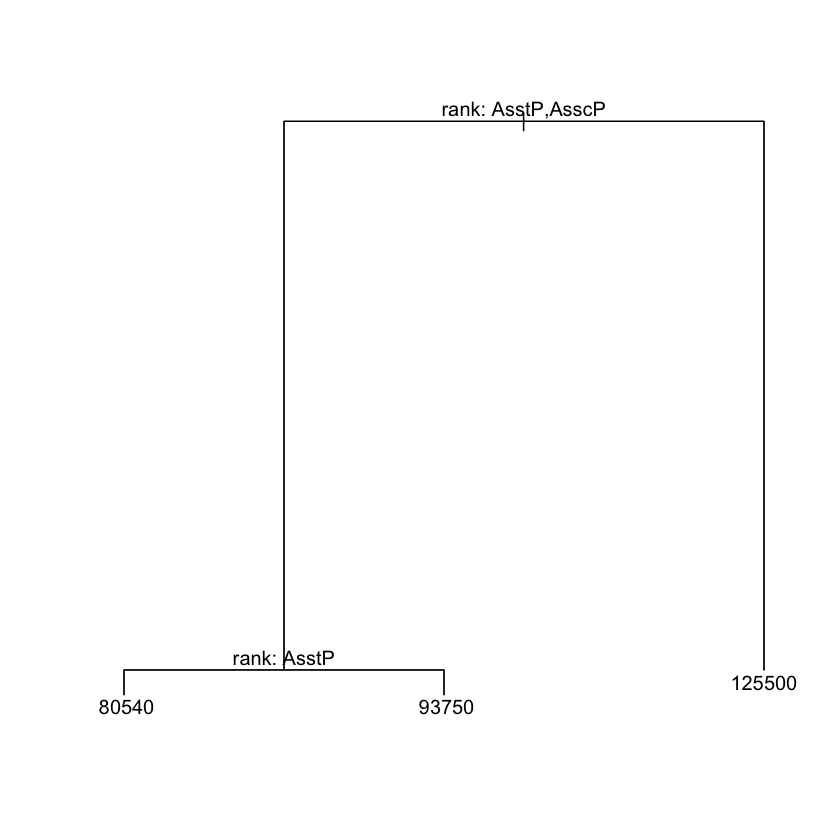

In [51]:
salaries.trainID = sample(1:379, 100)
salaries.train = Salaries[salaries.trainID,]
salaries.train = Salaries[-salaries.trainID,]

salaries.tree = tree(salary ~ rank  , data = salaries.train)

salaries.tree
plot(salaries.tree, type = "proportional")
text(salaries.tree, pretty = 1)



### Pruning

Grow a very large tree, and then *prune* it back in order to obtain a subtree. 

We try to find a subtree $T \subset T_0$ that for a given value of $\alpha$ minimizes 

$$ C_{\alpha}(T) = Q(T) + \alpha |T|,$$

where $Q(T)$ is our cost function. 

Use $K$-fold cross validation to find the best value of $\alpha$.

# Module 9: Support Vector Machines

SVMs is a computer science method, since no probabilities are involved. Often concidered one of the best "out of the box" classifiers. Its a generalization of the classifier *maximal margin classifier*, which can only be applied to datasets where classes can be separated by a linear boundary.

SVMs are intended for binary classification in settings where there are two classes.




**Maximal margin classifier**

Oprimization problem only solvable if the classes are linearly separable. 

**Soft Margin Classifier** / **Support Vector classifier**

As Maximal Margin Classifier, but includes a tuning parameter which allows for errors in training. Works well for almost linearly separable spaces.

**Support Vector Machines**

Enlarges the feature space in a clever way using *kernels* which accomodates for a non-linear decision boundary. 

Idea: Map covariates to a feature space. Do linear separation in the feature space, project down on covariate space to obtain the nonlinear decision boundary. 2D example with gaussian kernel for illustration:

![kernel](Kernel.png)



The collection of indeces of support vectors $S$, parameters $\alpha_i$.

$$ f(x) = \beta_0 + \sum_{i\in S} \alpha_i K(x,x_i) $$

# Module 10: Unsupervised learning

Supervised Learning:
- $n$ observations.
    - Each containing features **and** responses
- Regression and classification are widely known examples.

Unsupervised learning:
- $n$ observations.
    - Each containing features.
- Objective: Discover interesting properties about the data.
    - Better data visualization
    - Reduce computational complexity
    - Discover groups among data points

In general, unsupervised learning methods are more subjective and its hard to assess the results. There is usually no ground-truth to compare against. The remedy for this is to use unsupervised learning as a part of a bigger goal, and then to evaluate how they contribute to such bigger goal.

Example: How does clustering shoppers improve your recommendation algorithm? How does clustering documents reduce the computational complexity and what was the cost involved?

### Data Visualization

We want to visualize $n$ observations with $p$ features. One simple technique is to do a two dimentional scatterplot of the data. This gives $p(p-1)/2$ plots, each containing a small fraction of the available information in the dataset. 

Ideally we want to find a low dimentional representation of the data that captures most of the information available. In a perfect scenario this representation is 2 or 3 dimentional.

### PCA

PCA turns a large set of correlated variables into a smaller set of orthogonal ones.

The following focuses on PCA as a tool for data exploration. 

### Clustering methods

# GGplot stuff

We use the Salaries dataset from the carData library to find nice ways to plot.

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


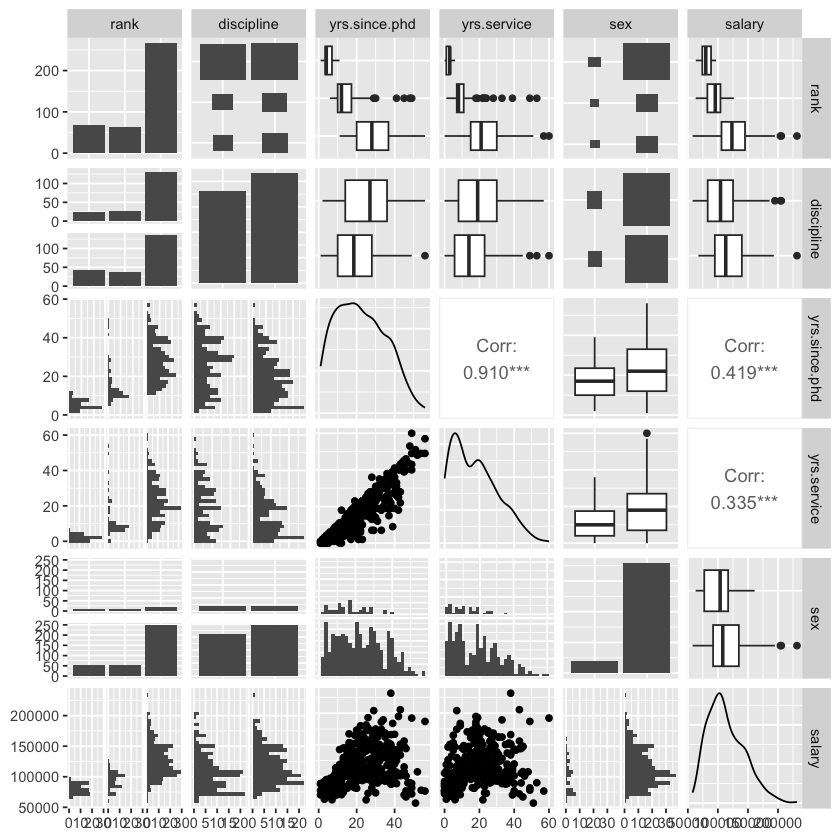

In [3]:
ggpairs(Salaries)

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


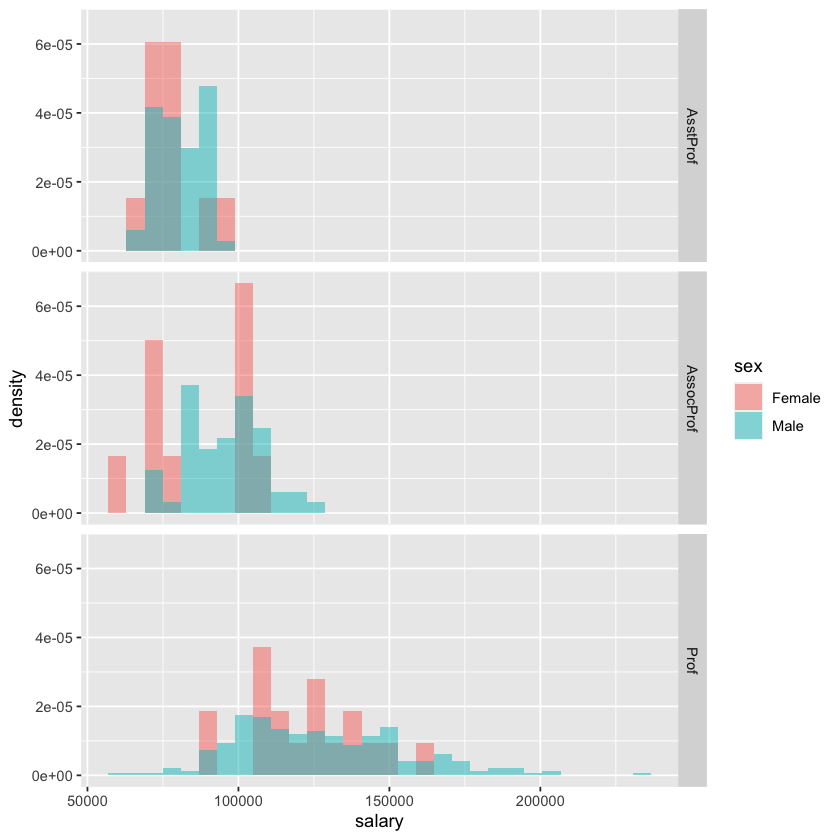

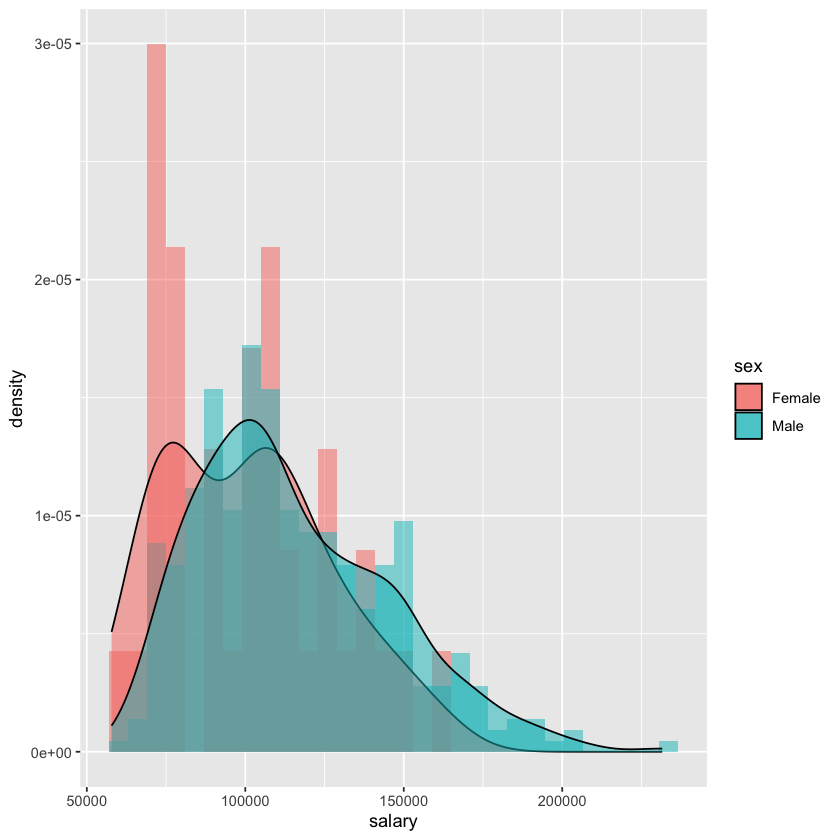

In [43]:
#Histogram plotting. 

#"fill = sex" colors the histogram accordig to the categorical variable sex.
ggplot(data = Salaries, aes(x= salary, fill = sex)) +
    geom_histogram(aes(y = ..density..), position = "identity", alpha = .5) +
    #Separates the data accordig to rank and plots a histogram for each value of the variable. 
    facet_grid(rank ~ .)


ggplot(data = Salaries, aes(x= salary, fill = sex)) +
    #Position = "identity" makes two overlapping histograms according to the fill variable sex, as opposed to stacking the histograms. 
    # alpha = 0.6 specifies the opacity ("seethroughness") 
    # aes(y = ..density..) to get density rather than frequency
    geom_histogram(aes(y = ..density..), position = "identity", alpha = .5) + 
    geom_density( alpha = .5)


#Todo. Bootstrap the female data. To get a better sense.
